<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/rbf_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

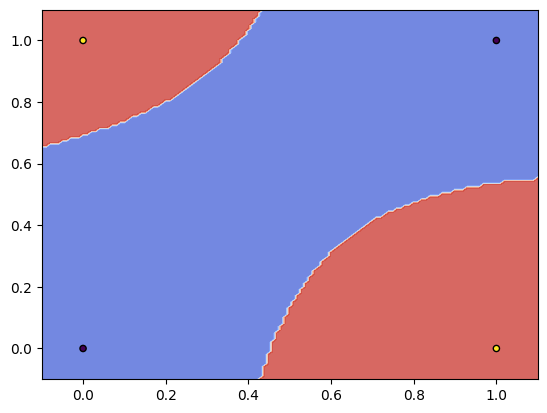

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Функция радиальной базисной функции
def rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

# Создание матрицы фич
def create_feature_matrix(X, centers, sigma):
    phi = np.empty((X.shape[0], centers.shape[0]))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            phi[i, j] = rbf(x, c, sigma)
    return phi

# Обучение линейной модели
def train_linear_model(phi, y):
    return np.linalg.pinv(phi) @ y

# Предсказание
def predict(X, centers, sigma, weights):
    phi = create_feature_matrix(X, centers, sigma)
    return np.where(phi @ weights > 0.5, 1, 0)

# Параметры
num_centers = 5
sigma = 0.9
centers = np.random.rand(num_centers, 2)

# Создание матрицы фич
phi = create_feature_matrix(X, centers, sigma)

# Обучение модели
weights = train_linear_model(phi, y)

# Визуализация
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = predict(np.c_[xx.ravel(), yy.ravel()], centers, sigma, weights)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()